# Analysis by Contents

In [1]:
import pandas as pd
from konlpy.tag import Okt
from collections import Counter
from soynlp.utils import DoublespaceLineCorpus
from soynlp.noun import LRNounExtractor_v2
okt = Okt()

### 1. 전체 데이터

In [2]:
every = pd.read_csv('./real_results/concat_everything_hear.csv')
every

,Unnamed: 0,Unnamed: 0.1,question_num,modality,answer,answer_input,submit_time,elapse_time
0,0,0,1,"""music""","[""K-POP, 걸그룹, 댄스음악, 리드미컬하다, 잘게 쪼개지는 박자, 반복되는 ...",NaN,2021-11-11 21:30:04,555094
1,1,1,2,"""music""","[""무대에서 춤을 추고 있는 걸그룹 멤버들, 그러다 노래가 끝나는 박자에 맞춰 엔딩...",NaN,2021-11-11 21:39:42,572337
2,2,2,3,"""music""","{""select"": [""아름다운""], ""evaluation"": {""strength""...",NaN,2021-11-11 21:41:17,91508
3,3,3,4,"""music""","[""활기차고 에너지 넘치는 소녀, 강렬한 락 사운드, 한껏 고조되었다가 차분해지는 ...",NaN,2021-11-11 21:44:27,188617
4,4,4,5,"""music""","[""무대 위에서 차분하게 서있다가 샤우팅 후 크게 점프하며 긴 머리가 흩날리는 걸그...",NaN,2021-11-11 21:49:55,325476
...,...,...,...,...,...,...,...,...
7057,315,315,302,"""visual""","[""축구장에서 혼자 조용한 꼬마 아이"", ""아주 간간히 들리는 조용한 발라드"", ""...",NaN,2021-11-13 01:21:42,87746
7058,316,316,303,"""visual""","{""select"": [], ""evaluation"": {""strength"": 4, ""...",NaN,2021-11-13 01:21:48,4321
7059,317,317,304,"""visual""","[""부슬부슬 비가 내리며 온세상이 젖는다"", ""추적추적한 날의 복잡한 기분을 시각화...",NaN,2021-11-13 01:22:49,50686
7060,318,318,305,"""visual""","[""비가 내려 페인트가 빗물에 섞여 하수구로 흐르는 영상"", ""빗소리와 어울리는 발...",NaN,2021-11-13 01:24:21,90981


In [3]:
every = every.drop(['Unnamed: 0'], axis=1)
every

,Unnamed: 0.1,question_num,modality,answer,answer_input,submit_time,elapse_time
0,0,1,"""music""","[""K-POP, 걸그룹, 댄스음악, 리드미컬하다, 잘게 쪼개지는 박자, 반복되는 ...",NaN,2021-11-11 21:30:04,555094
1,1,2,"""music""","[""무대에서 춤을 추고 있는 걸그룹 멤버들, 그러다 노래가 끝나는 박자에 맞춰 엔딩...",NaN,2021-11-11 21:39:42,572337
2,2,3,"""music""","{""select"": [""아름다운""], ""evaluation"": {""strength""...",NaN,2021-11-11 21:41:17,91508
3,3,4,"""music""","[""활기차고 에너지 넘치는 소녀, 강렬한 락 사운드, 한껏 고조되었다가 차분해지는 ...",NaN,2021-11-11 21:44:27,188617
4,4,5,"""music""","[""무대 위에서 차분하게 서있다가 샤우팅 후 크게 점프하며 긴 머리가 흩날리는 걸그...",NaN,2021-11-11 21:49:55,325476
...,...,...,...,...,...,...,...
7057,315,302,"""visual""","[""축구장에서 혼자 조용한 꼬마 아이"", ""아주 간간히 들리는 조용한 발라드"", ""...",NaN,2021-11-13 01:21:42,87746
7058,316,303,"""visual""","{""select"": [], ""evaluation"": {""strength"": 4, ""...",NaN,2021-11-13 01:21:48,4321
7059,317,304,"""visual""","[""부슬부슬 비가 내리며 온세상이 젖는다"", ""추적추적한 날의 복잡한 기분을 시각화...",NaN,2021-11-13 01:22:49,50686
7060,318,305,"""visual""","[""비가 내려 페인트가 빗물에 섞여 하수구로 흐르는 영상"", ""빗소리와 어울리는 발...",NaN,2021-11-13 01:24:21,90981


### 2. 음악 데이터

In [4]:
music_df = every[every['modality'] == '"music"']
music_df

,Unnamed: 0.1,question_num,modality,answer,answer_input,submit_time,elapse_time
0,0,1,"""music""","[""K-POP, 걸그룹, 댄스음악, 리드미컬하다, 잘게 쪼개지는 박자, 반복되는 ...",NaN,2021-11-11 21:30:04,555094
1,1,2,"""music""","[""무대에서 춤을 추고 있는 걸그룹 멤버들, 그러다 노래가 끝나는 박자에 맞춰 엔딩...",NaN,2021-11-11 21:39:42,572337
2,2,3,"""music""","{""select"": [""아름다운""], ""evaluation"": {""strength""...",NaN,2021-11-11 21:41:17,91508
3,3,4,"""music""","[""활기차고 에너지 넘치는 소녀, 강렬한 락 사운드, 한껏 고조되었다가 차분해지는 ...",NaN,2021-11-11 21:44:27,188617
4,4,5,"""music""","[""무대 위에서 차분하게 서있다가 샤우팅 후 크게 점프하며 긴 머리가 흩날리는 걸그...",NaN,2021-11-11 21:49:55,325476
...,...,...,...,...,...,...,...
6983,241,100,"""music""","[""기차를 타고 일정한 목적지 없이 떠나는 느낌"", ""짜증나고 답답할때 이 노래를 ...",NaN,2021-11-13 00:13:01,38285
6984,242,101,"""music""","[""기차안에서 멍하니 시선을 풍경에 고정한 아저씨"", ""턱을 괴고 힘없이 한쪽 다리...",NaN,2021-11-13 00:14:26,83048
6985,243,102,"""music""","{""select"": [], ""evaluation"": {""strength"": 2, ""...",NaN,2021-11-13 00:14:31,2998
6986,244,103,"""music""","[""라디오에서 마지막 인사말할 때 나오는 음악의 느낌"", ""추억의 감성 폭발, 들으...",NaN,2021-11-13 00:15:26,53514


### 3. 댄스 데이터

In [5]:
dance_df = every[every['modality'] == '"dance"']
dance_df

,Unnamed: 0.1,question_num,modality,answer,answer_input,submit_time,elapse_time
52,52,139,"""dance""","[""건들거린다. 자신감이 넘친다. 동작이 크다. 단순하다. 다리가 교차된다. 팔을 ...",NaN,2021-11-12 16:37:13,12499795
53,53,140,"""dance""","[""딱히 떠오르는 심상이 없다."", ""보이그룹의 단체 댄스곡."", ""심심한 것"", ...",NaN,2021-11-12 16:39:14,119520
54,54,141,"""dance""","{""select"": [""강인한""], ""evaluation"": {""strength"":...",NaN,2021-11-12 16:39:41,24693
55,55,142,"""dance""","[""힙합 댄스, 경쾌하다, 활기차다, 리드미컬하다, 신난다."", ""힙합 댄스의 기초...",NaN,2021-11-12 16:41:02,80917
56,56,143,"""dance""","[""그래비티가 벽에 그려진 스케이트장에서 스케이트를 타는 소년."", ""펑키한 힙합 ...",NaN,2021-11-12 16:42:59,114987
...,...,...,...,...,...,...,...
6917,175,154,"""dance""","[""가위를 한 모서리를 잡고 돌리는 느낌"", ""360도로 회전하며 다리를 가위처럼 ...",NaN,2021-11-12 23:24:26,38490
6918,176,155,"""dance""","[""팽이가 계속 같은 속도로 도는 장면"", ""효과음이 하나도 없는 단조로운멜로디가 ...",NaN,2021-11-12 23:25:59,92416
6919,177,156,"""dance""","{""select"": [], ""evaluation"": {""strength"": 7, ""...",NaN,2021-11-12 23:26:05,3652
6920,178,157,"""dance""","[""여기가 어딘지 찾는 느낌"", ""여기가 어딘지 알고 싶다면 이 동작을 반복하세요""]",NaN,2021-11-12 23:26:43,36636


### 4. 시각적 데이터

In [6]:
visual_df = every[every['modality'] == '"visual"']
visual_df

,Unnamed: 0.1,question_num,modality,answer,answer_input,submit_time,elapse_time
113,113,199,"""visual""","[""수염 난 30대의 흑인이 소파에 누워 서럽게 울고있다."", ""울고 싶을 때 프로...",NaN,2021-11-12 18:06:13,51302
114,114,200,"""visual""","[""자신이 먼저 이별을 고하고 찌질하게 울고 있는 남자의 모습."", ""느리고 격정적...",NaN,2021-11-12 18:07:40,85713
115,115,201,"""visual""","{""select"": [""슬픈""], ""evaluation"": {""strength"": ...",NaN,2021-11-12 18:07:51,8928
116,116,202,"""visual""","[""백발의 노인이 기쁜 일이 있는 듯 펄쩍 뛰어 자신의 딸을 껴안고 있다."", ""신...",NaN,2021-11-12 18:25:47,1075517
117,117,203,"""visual""","[""딸이 불임 때문에 고생하다가 결국 노력 끝에 아이를 임신했다는 소식을 들은 할아...",NaN,2021-11-12 18:28:48,180742
...,...,...,...,...,...,...,...
7057,315,302,"""visual""","[""축구장에서 혼자 조용한 꼬마 아이"", ""아주 간간히 들리는 조용한 발라드"", ""...",NaN,2021-11-13 01:21:42,87746
7058,316,303,"""visual""","{""select"": [], ""evaluation"": {""strength"": 4, ""...",NaN,2021-11-13 01:21:48,4321
7059,317,304,"""visual""","[""부슬부슬 비가 내리며 온세상이 젖는다"", ""추적추적한 날의 복잡한 기분을 시각화...",NaN,2021-11-13 01:22:49,50686
7060,318,305,"""visual""","[""비가 내려 페인트가 빗물에 섞여 하수구로 흐르는 영상"", ""빗소리와 어울리는 발...",NaN,2021-11-13 01:24:21,90981


# 감정단어+차원 vs 텍스트로 나누기

In [7]:
# annotate 단어와 점수만 뽑아내는 함수
def extract_annotate(df):
    lst = df['answer'].tolist()
    annotate_lst = []
    
    for i in range(len(lst)):
        try:
            if "select" in lst[i]:
                annotate_lst.append(lst[i])
        except:
            pass
        
    return annotate_lst

In [8]:
# 텍스트 리스트만 뽑아내는 함수
def extract_text(df):
    lst = df['answer'].tolist()
    text_lst = []
    
    for i in range(len(lst)):
        try:
            if "select" not in lst[i]:
                lst[i] = lst[i].replace('[', '').replace(']', '')
                text_lst.append(lst[i])
        except:
            pass
        
    return text_lst

## 텍스트 리스트에서 단어 뽑아서 품사 분류하기

In [9]:
# 문장 리스트에서 감정 단어(형용사)만 뽑는 함수
def extract_adj_lst(sentence_lst):
    okts = []
    adj = []
    real_adj = []
    
    for s in range(len(sentence_lst)):
        okts.append(okt.pos(sentence_lst[s]))
    
    for i in range(len(okts)):
        for j in range(len(okts[i])):
            if okts[i][j][1] == 'Adjective' and len(okts[i][j][0]) > 1:
                adj.append(okts[i][j][0])
    
    for w in adj:
        if w not in stop_words:
            real_adj.append(w)
            
    real_adj = set(real_adj)
            
    return real_adj

In [10]:
# 문장 리스트에서 동사만 뽑는 함수
def extract_verb_lst(sentence_lst):
    okts = []
    verb = []
    real_verb = []
    
    for s in range(len(sentence_lst)):
        okts.append(okt.pos(sentence_lst[s]))
    
    for i in range(len(okts)):
        for j in range(len(okts[i])):
            if okts[i][j][1] == 'Verb' and len(okts[i][j][0]) > 1:
                verb.append(okts[i][j][0])
    
    for w in verb:
        if w not in stop_words:
            real_verb.append(w)
            
            
    real_verb = set(real_verb)
            
    return real_verb

In [11]:
# 문장 리스트에서 명사만 뽑는 함수
def extract_noun_lst(sentence_lst):
    with open('sentence.txt', 'w') as f:
        for line in sentence_lst:
            f.write(line)
            
    real_noun = []
    corpus_path = 'sentence.txt'
    sents = DoublespaceLineCorpus(corpus_path, iter_sent=True)
    noun_extractor = LRNounExtractor_v2(verbose=True)
    nouns = noun_extractor.train_extract(sents)
    
    for key, value in nouns.items(): # v[0] = frequency, v[1] = score
        if value[0] >= 1 or value[1] >= 0.2:
            if len(key) > 1:
                real_noun.append(key)
                
    real_noun = set(real_noun)
    
    return real_noun

In [12]:
# 감정단어 불용어 사전 불러오기
with open('stop_words.txt', 'r') as file:
    stop_word = file.readline()
    stop_word = str(stop_word)
    
stop_word = stop_word.replace("\ufeff", '').replace("'", '').replace(",", '').replace('\n', '').replace("’", '').replace("‘", '')
stop_words = stop_word.split()

### 1. 음악

In [13]:
only_music = extract_text(music_df)

In [14]:
music_emotional_words = extract_adj_lst(only_music)
print(music_emotional_words)

{'새로', '애달픈', '있다라는', '기괴하다', '깨끗함', '필요없이', '답답함에', '뚜렷해진다는', '간단하면서', '빠르게', '있는지만', '장엄함과', '어지럽다', '신난지만', '높았다가', '성공한', '힘듦이', '처량하지', '단순하고', '두드러지는', '슬펐던', '자유분방한', '상쾌해지는', '빨라질', '빠른음', '무서워져서', '독특한게', '속상함을', '무섭고', '힘없이', '더한다', '귀여워서', '차갑게', '강해서', '풍부하게', '장난스런', '설레고', '시끄러워서', '무더운', '멀쩡하고', '고상하게', '간결하고', '쓸쓸하다', '아니에요', '기괴하게', '비슷한', '차분해', '야할것', '좋아해도', '청량하고', '힘듦', '아련하다', '부드럽게', '좋아하지', '경쾌함을', '초조함', '투명한', '기묘한', '안되는나', '빨라진다', '아름다', '다르게', '싱그럽고', '강력하다', '즐거워하며', '사뿐하게', '무섭다', '우스꽝스러운', '드문', '넘치게', '환해지는', '혼잡하게', '무겁고', '간단하게', '주도하며', '명랑하다', '유명한데', '부드러우면서도', '느려졌다', '있어주던', '간절히', '독특한', '조화로운', '복잡하지', '우울해지는', '차분하게', '편히', '끔찍함', '고급스럽고', '강함', '단순하면서도', '강력한', '불리한', '정확한', '섹시함을', '세련된', '화려하게', '느리며', '느리고', '우울할', '가득하며', '힘듦과', '평화로우면서', '한가로운', '차분한듯', '시끄러', '시끄럽거나', '즐겁다가도', '슬프면서도', '화해서', '들뜨게', '유연함이', '얕아진다', '가벼고', '우울해하는', '홀가분하게', '굳게', '빨라져서', '발랄하고', '활발히', '조용하게', '힘찬', '설레는', '작다', '신선함', '슬프다는', '쾌활하고', '오래된', '힘들', '애틋한'

In [15]:
music_noun_words = extract_noun_lst(only_music)
print(music_noun_words)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 18122 from 776 sents. mem=0.532 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=49357, mem=0.554 Gb
[Noun Extractor] batch prediction was completed for 6571 words
[Noun Extractor] checked compounds. discovered 814 compounds
[Noun Extractor] postprocessing detaching_features : 2707 -> 2461
[Noun Extractor] postprocessing ignore_features : 2461 -> 2422
[Noun Extractor] postprocessing ignore_NJ : 2422 -> 2421
[Noun Extractor] 2421 nouns (814 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.566 Gb                    
[Noun Extractor] 57.09 % eojeols are covered


{'이입', '유혹', '서운', '""미', '둘러', 'k-pop', '드라마', '이어폰', '뮤비', '회상', '정체', '반신욕', '청년', '연속""', '자극', '고물', '합주', '엔딩직전', '사진', '부자', 'dun', '후배', '힘듦', '"가사', '모험', '"한동작', '틀어', '애인', '뮤직', '"처절', '음료', '""황진', '여름', '"베이스', '정신', '"고급', '"오래', '"통통', '매드무비', '상큼', '복장', '"개구쟁이', '비하', '위험', '갔다', '음악.""나이트', '""여성', '절절', '고음', '"중간', '이걸', '피아노""가을', '음악.""자신', '가수', '소주', '기침소리', '중심', '재난', '"담담', '확대', '나무아래', '자유', '신분차이', '스포트라이트', '플룻소리', '음악""신', '음악""자전거', '"물방울', '"비장', '잠깐', '절실', '"조커', '한명', '음악""전쟁', '대중적', '양손', '"새', '파격적', '"왕', '압도적', '뒷부분', '노래""바다', '유리잔', '깨달음', '천둥', '협박', '헤엄', '""끈적끈적', '음악""클럽', '이것', '청자', '"고개', '""봄', '성질', '노래""축제', '브금""부모님', '방송', '"오르', '"강력', '"슬픔', '애교', '자기몸을', '"땅', '건들건들', '통일', 'shot"', '탄생', '느낌""무언', '"하와이', '"노을', '이상', '댄스곡""자신', '""트와이스', '오후', '파워', '"어린아이', '가죽', '연결', '엄청', '현실', '흘러', '컨텐츠', '보석', '가사', '끈적', '노래""여자', '""아이', '장미', '"아침', '"전투력', '여주인공', '중간중간', 'boy""뮤비', '위스키', '셔츠', '"장난', '정리', '"머리어깨', '본인', '요정', '

In [16]:
music_verb_words = extract_verb_lst(only_music)
print(music_verb_words)

{'펼쳐', '믿고', '이루어진', '올린', '되었다가', '빛나면서', '멈추고', '둘러', '드립니다', '걷고', '뛰며', '보게', '쓰인', '부르고', '잘라', '여겨질', '흐르는', '나오고', '쪼개지는', '들썩이지만', '쳐를', '올리면서', '굴러가며', '나가기전', '여유롭다', '돌리다가', '울어', '몰려온다', '느끼는', '붙는', '만나기를', '움직이다가', '쪼개져', '앉거나', '대면서도', '나옴을', '가진듯', '채워가는', '틀어', '알아듣지', '났고', '갖고', '걸어가다', '펼쳐진', '오면', '타게', '끊겨서', '걷던', '않으면서', '끝났다며', '쓰일만', '휘날리는', '기다리지', '서성거리면서', '아는지', '비하가', '컸다가', '할게요', '들렸다', '들으면서', '휘날리며', '나아간다', '커진다', '털어놓을', '치듯이', '춤추고', '혼남', '살릴', '되며', '끝나', '주어진', '들어오면서', '알리러', '쓸만', '치이이하는', '뻗어', '끼우고', '오르내리', '돋구고', '켜자마자', '모을', '달려갈게요', '이끌어가는', '늦게까지', '뛰면서', '끄덕여진다', '늦은', '채워지는', '가리키', '듣지는', '들읍시다', '모르겠지만', '반짝거리고', '빠져있는', '추며', '하고있는', '만드는', '크지', '받았습니다', '불러일으키고', '가리고', '움직이되', '견뎌내는', '구르고', '내리는', '않던', '생각났다', '걸어다니며', '이루어져야', '하다', '흔들', '나왔을', '싸울', '짜내', '닿으면', '숨기고자', '지나가고', '돌린', '밝아지면서', '들어있는', '내려치는', '튀어나올', '떠나지마', '끊기', '감싸고', '옮겨', '어울려서', '매고', '내밀며', '꺼내자', '들리면서', '이끄는', '느낌있게', '때리면', '나눠주는', '거칠지', '해서', '마

### 2. 댄스+시각

In [17]:
dance_with_visual = extract_text(dance_df) + extract_text(visual_df)

In [18]:
dance_with_visual_emotional_words = extract_adj_lst(dance_with_visual)
print(dance_with_visual_emotional_words)

{'부자연스러', '멀로', '신날', '눈부시다', '친근하기도', '빨라졌다', '적합할', '활발함', '자랑스러워하는', '무섭고', '공허함', '고요해진다', '만족하는', '장난스런', '답답함', '쓸쓸하다', '힘듦', '청량하고', '당했을', '투명한', '부드럽게', '노련한', '화함', '다르게', '싱그럽고', '쉬워', '우스꽝스러운', '무섭다', '하얗게', '행복해하고', '차분하게', '자그만한', '궁금해하며', '다를까', '당돌한', '느리며', '행복해서', '어이없어', '굳게', '신선함', '오래된', '힘들', '만족해하고', '반갑다', '멋지지만', '평화롭다', '있어서는', '반가워하는', '이상하게', '정교함을', '강력하고', '유연하지만', '단순하지만', '억울함', '더러운', '산만하게', '신난', '강렬함이', '슬프게', '안좋다', '재미있어서', '깊다', '안타깝고', '활발해', '화려하지만', '산뜻한', '자연스러워진다', '젊고', '찬란한', '박하다', '재미있다', '강렬해지는', '서운함의', '유연해', '급박하다', '사랑스러워하는', '머쓱해', '즐겁게', '미쳤어', '오묘하게', '느리지만', '고요하게', '억울하다', '느려지고', '확실한', '단순하다', '건조한', '잔잔하게', '광활하다', '슬퍼하고', '차분하다', '따뜻해', '체념한듯', '어렵고', '잘난', '없이도', '당연히', '행복함', '유연하고', '넘쳐', '잔잔하다가', '인자함', '강렬하게', '우울하지만', '흔하게', '노랗게', '어색한', '화려하며', '쾌활함', '스러워', '행복하다', '같기도', '있었다', '격렬하게', '따스함', '애절한', '끼부리면서', '슬퍼', '고요하다가', '행복함이', '오묘하다', '가득한', '경쾌함이', '차분하지만', '서툰', '기뻐하며', '섹시하면서도', '굉장히', '신기해', '끼부리기', '쓸쓸한',

In [19]:
dance_with_visual_noun_words = extract_noun_lst(dance_with_visual)
print(dance_with_visual_noun_words)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 21235 from 673 sents. mem=0.540 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=57369, mem=0.568 Gb
[Noun Extractor] batch prediction was completed for 7672 words
[Noun Extractor] checked compounds. discovered 1198 compounds
[Noun Extractor] postprocessing detaching_features : 3470 -> 3389
[Noun Extractor] postprocessing ignore_features : 3389 -> 3339
[Noun Extractor] postprocessing ignore_NJ : 3339 -> 3334
[Noun Extractor] 3334 nouns (1198 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.580 Gb                    
[Noun Extractor] 56.69 % eojeols are covered
{'밴드음악', '춤""수업', '유혹', '좌우', '원통', '서운', '둘러', '부하', '드라마', '"짐캐리', '태연""', '회상', '"약간', '몸통', '청년', '교단', '영화""연인', '그녀', '자극', '무표정하고', '있다.""팔', '사진', '개구리알""', '이미지""터널'

In [20]:
dance_with_visual_verb_words = extract_verb_lst(dance_with_visual)
print(dance_with_visual_verb_words)

{'믿고', '펼쳐', '이루어진', '올린', '저지르고선', '끄덕임으로', '멈추고', '않겠냐', '보내던', '걷고', '보게', '뛰었다', '뛰며', '덮는다', '오며', '흐르는듯', '쓰인', '부르고', '주세요', '기울일', '놀려하다가', '삭히고', '흐르는', '나오고', '쪼개지는', '휘감', '올리면서', '혼내서', '나가기전', '여유롭다', '돌리다가', '느끼는', '붙는', '움직이다가', '하겠는지', '바뀌어도', '쪼개져', '넘어졌을것', '앉거나', '지나가는것이', '틀어', '틀어져', '웃어주니', '났고', '펼쳐진', '붙일', '대들지는', '갖고', '잡아주면서', '걷던', '섬기는', '두리번거리는', '받았는데', '휘날리는', '달려와', '억눌려', '듣한', '받지', '들으면서', '빠져들', '참지', '쫓아내야', '커진다', '나아간다', '춤추고', '시켜주며', '되며', '놀라면', '해치려는', '보여주지', '깔려있다', '숨긴다', '쓸만', '눌러서', '터지듯이', '기어다니며', '하려던', '뻗어', '짧아졌다를', '휩싸여', '닦는', '늦게까지', '놓여진', '들어줄테야', '뛰면서', '살리려고', '늦은', '찌른다', '돋아주고', '나타내려는', '어른이라며', '모르겠지만', '가까워질', '잃지', '알려', '닦고', '반짝거리고', '떠올라', '빠져있는', '추며', '만드는', '가를', '훑는지', '크지', '않았나', '없애', '보여줌으로써', '흔들린다', '얼더', '가리고', '모르면', '해보이는', '심어주는', '주무시니까', '구르고', '내리는', '흘러가다가', '보았었는데', '생각났다', '걸어다니며', '놓다니', '지날수록', '하다', '만들어지지', '말아먹기', '흔들', '나왔을', '닿게', '싸울', '노리는', '자다', '사라지자', '감추는', '깨끗해진', '숨기고자', '흐리다', '되었

### 3. 청인 전체

In [21]:
all_words = only_music + dance_with_visual

In [22]:
all_adj_words = extract_adj_lst(all_words)

In [23]:
all_noun_words = extract_noun_lst(all_words)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 33994 from 1448 sents. mem=0.560 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=106725, mem=0.594 Gb
[Noun Extractor] batch prediction was completed for 11947 words
[Noun Extractor] checked compounds. discovered 2488 compounds
[Noun Extractor] postprocessing detaching_features : 5987 -> 5453
[Noun Extractor] postprocessing ignore_features : 5453 -> 5386
[Noun Extractor] postprocessing ignore_NJ : 5386 -> 5371
[Noun Extractor] 5371 nouns (2488 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.607 Gb                    
[Noun Extractor] 60.03 % eojeols are covered


In [24]:
all_verb_words = extract_verb_lst(all_words)

# Visualization

### Pie Chart 로 비율 나타내기

In [56]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [57]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

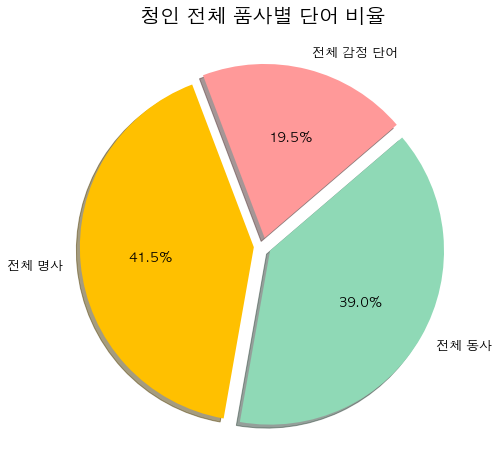

In [58]:
# 청인 전체- 감정단어 vs 비감정단어 비교
ratio = [len(all_noun_words), len(all_adj_words), len(all_verb_words)]
labels = ['전체 명사', '전체 감정 단어', '전체 동사']
explode = [0.05, 0.05, 0.05]
colors = ['#ffc000', '#ff9999', '#8fd9b6']

plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,8))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
        counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title('청인 전체 품사별 단어 비율', fontsize=20)
plt.show()

In [59]:
print('전체 명사', len(all_noun_words))
print('전체 형용사', len(all_adj_words))
print('전체 동사', len(all_verb_words))

전체 명사 5135
전체 형용사 2415
전체 동사 4837


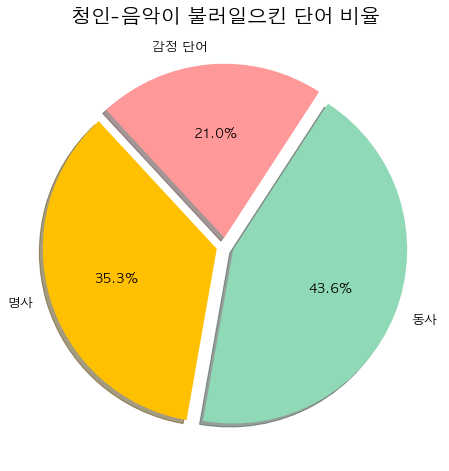

In [60]:
# 청인 콘텐츠별 - 감정단어 vs 비감정단어 비교
# (1) 음악
ratio = [len(music_noun_words), len(music_emotional_words), len(music_verb_words)]
labels = ['명사', '감정 단어', '동사']
explode = [0.05, 0.05, 0.05]
colors = ['#ffc000', '#ff9999', '#8fd9b6']

plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,8))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
        counterclock=False, explode=explode, shadow=True, colors=colors)
plt.title('청인-음악이 불러일으킨 단어 비율', fontsize=20)
plt.show()

In [61]:
print('음악 명사', len(music_noun_words))
print('음악 형용사', len(music_emotional_words))
print('음악 동사', len(music_verb_words))

음악 명사 2243
음악 형용사 1336
음악 동사 2768


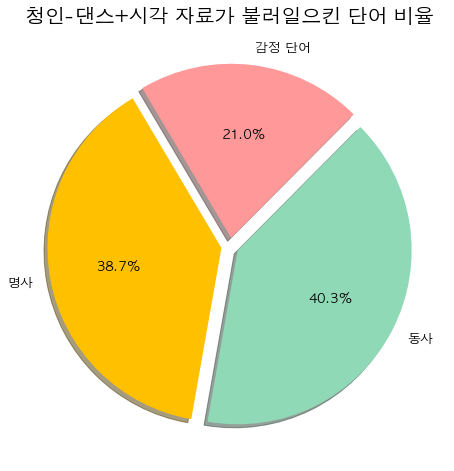

In [62]:
# 청인 콘텐츠별 - 감정단어 vs 비감정단어 비교
# (2) 댄스+시각 자료
ratio = [len(dance_with_visual_noun_words), len(dance_with_visual_emotional_words), len(dance_with_visual_verb_words)]
labels = ['명사', '감정 단어', '동사']
explode = [0.05, 0.05, 0.05]
colors = ['#ffc000', '#ff9999', '#8fd9b6']

plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,8))
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, 
        counterclock=False, explode=explode, shadow=True, colors=colors) 
plt.title('청인-댄스+시각 자료가 불러일으킨 단어 비율', fontsize=20)
plt.show()

In [63]:
print('댄스+시각 명사', len(dance_with_visual_noun_words))
print('댄스+시각 형용사', len(dance_with_visual_emotional_words))
print('댄스+시각 동사', len(dance_with_visual_verb_words))

댄스+시각 명사 3140
댄스+시각 형용사 1702
댄스+시각 동사 3272


### Bar Chart 로 개수 나타내기

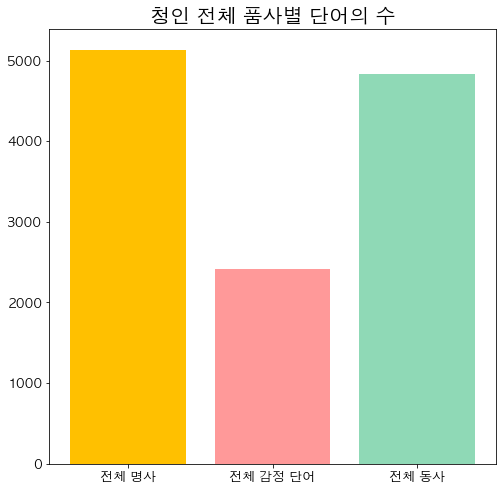

In [64]:
# 청인 전체- 감정단어 vs 비감정단어 비교
values = [len(all_noun_words), len(all_adj_words), len(all_verb_words)]
labels = ['전체 명사', '전체 감정 단어', '전체 동사']
explode = [0.05, 0.05, 0.05]
colors = ['#ffc000', '#ff9999', '#8fd9b6']

plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,8))
plt.bar(labels, values, color=colors)
plt.title('청인 전체 품사별 단어의 수', fontsize=20)
plt.show()

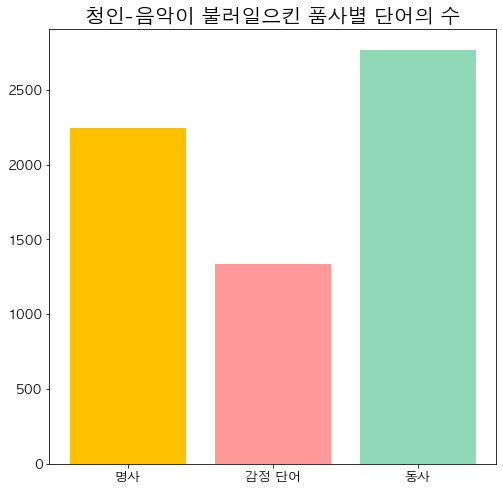

In [67]:
# 청인 전체- 감정단어 vs 비감정단어 비교
values = [len(music_noun_words), len(music_emotional_words), len(music_verb_words)]
labels = ['명사', '감정 단어', '동사']
explode = [0.05, 0.05, 0.05]
colors = ['#ffc000', '#ff9999', '#8fd9b6']

plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,8))
plt.bar(labels, values, color=colors)
plt.title('청인-음악이 불러일으킨 품사별 단어의 수', fontsize=20)
plt.show()

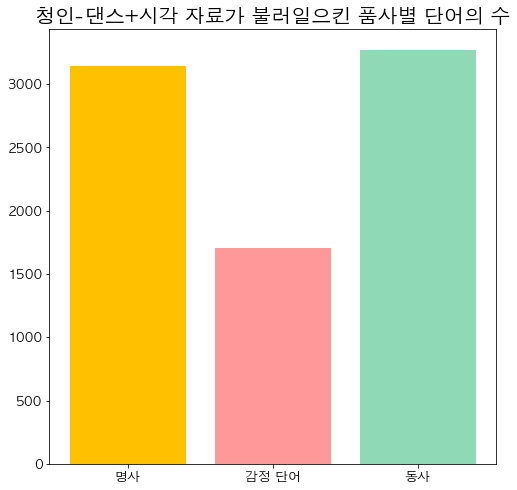

In [69]:
# 청인 전체- 감정단어 vs 비감정단어 비교
values = [len(dance_with_visual_noun_words), len(dance_with_visual_emotional_words), len(dance_with_visual_verb_words)]
labels = ['명사', '감정 단어', '동사']
explode = [0.05, 0.05, 0.05]
colors = ['#ffc000', '#ff9999', '#8fd9b6']

plt.rcParams['font.size'] = 13
plt.figure(figsize=(8,8))
plt.bar(labels, values, color=colors)
plt.title('청인-댄스+시각 자료가 불러일으킨 품사별 단어의 수', fontsize=20)
plt.show()

## 청인 감정 단어 차원 만들기

In [33]:
from ast import literal_eval

In [48]:
# 예시로, 어노테이션된 데이터 불러오기
annotated_data = extract_annotate(every)
annotated_data

['{"select": ["아름다운"], "evaluation": {"strength": 6, "positive": 7, "activity": 3}}',
 '{"select": ["쾌활한", "강인한"], "evaluation": {"strength": 8, "positive": 8, "activity": 9}}',
 '{"select": ["아름다운"], "evaluation": {"strength": 6, "positive": 3, "activity": 5}}',
 '{"select": ["반항적인", "짜증나는"], "evaluation": {"strength": 9, "positive": 2, "activity": 9}}',
 '{"select": ["평화로운"], "evaluation": {"strength": 7, "positive": 7, "activity": 3}}',
 '{"select": ["쾌활한"], "evaluation": {"strength": 9, "positive": 9, "activity": 9}}',
 '{"select": ["쾌활한", "즐거운"], "evaluation": {"strength": 10, "positive": 10, "activity": 10}}',
 '{"select": ["기대되는"], "evaluation": {"strength": 7, "positive": 6, "activity": 8}}',
 '{"select": ["욕망의"], "evaluation": {"strength": 7, "positive": 6, "activity": 6}}',
 '{"select": ["걱정되는"], "evaluation": {"strength": 7, "positive": 7, "activity": 9}}',
 '{"select": ["반항적인"], "evaluation": {"strength": 9, "positive": 3, "activity": 8}}',
 '{"select": ["감동적인"], "evaluatio

In [35]:
emotion_dict = {"즐거운": [0, 0, 0], "기쁜": [0, 0, 0], "쾌활한": [0, 0, 0], "욕망의": [0, 0, 0], "아름다운": [0, 0, 0], "차분한": [0, 0, 0], "평화로운": [0, 0, 0], "강인한": [0, 0, 0], "감동적인": [0, 0, 0],
               "믿음직한": [0, 0, 0], "기대되는": [0, 0, 0], "불안한": [0, 0, 0], "걱정되는": [0, 0, 0], "무서운": [0, 0, 0], "싫은": [0, 0, 0], "짜증나는": [0, 0, 0], "화난": [0, 0, 0], "경계되는": [0, 0, 0],
               "반항적인": [0, 0, 0], "지루한": [0, 0, 0], "슬픈": [0, 0, 0], "우울한": [0, 0, 0], "혐오스러운": [0, 0, 0], "놀란": [0, 0, 0], "아무런 감정이 들지 않는다": [0, 0, 0]}

In [36]:
# 각 차원의 emotion 딕셔너리에 값을 더해주는 함수
def make_dimension_dict(emotion_dict, annotated_data):
    for key, value in emotion_dict.items():
        for j in range(len(annotated_data)):
            annotated_dict = literal_eval(annotated_data[j])
            try:
                if key in annotated_dict['select']:
                    emotion_dict[key][0] += annotated_dict['evaluation']['strength']
                    emotion_dict[key][1] += annotated_dict['evaluation']['positive']
                    emotion_dict[key][2] += annotated_dict['evaluation']['activity']
            except:
                pass
            
    return emotion_dict

In [37]:
dimension_dict = make_dimension_dict(emotion_dict, annotated_data)
dimension_dict

{'즐거운': [3124, 3242, 3156],
 '기쁜': [1915, 2025, 1822],
 '쾌활한': [3731, 3701, 3927],
 '욕망의': [1019, 815, 875],
 '아름다운': [1708, 1696, 1052],
 '차분한': [1602, 1527, 700],
 '평화로운': [1704, 1818, 1012],
 '강인한': [1858, 1580, 1695],
 '감동적인': [841, 830, 450],
 '믿음직한': [287, 301, 219],
 '기대되는': [2070, 2123, 1833],
 '불안한': [1001, 412, 601],
 '걱정되는': [737, 323, 384],
 '무서운': [874, 273, 508],
 '싫은': [443, 165, 324],
 '짜증나는': [578, 255, 440],
 '화난': [429, 158, 304],
 '경계되는': [1134, 482, 693],
 '반항적인': [1191, 727, 1098],
 '지루한': [235, 140, 120],
 '슬픈': [1295, 651, 498],
 '우울한': [895, 403, 319],
 '혐오스러운': [198, 64, 127],
 '놀란': [594, 263, 471],
 '아무런 감정이 들지 않는다': [494, 438, 394]}

In [38]:
emotion_dict = {"즐거운": [0, 0, 0], "기쁜": [0, 0, 0], "쾌활한": [0, 0, 0], "욕망의": [0, 0, 0], "아름다운": [0, 0, 0], "차분한": [0, 0, 0], "평화로운": [0, 0, 0], "강인한": [0, 0, 0], "감동적인": [0, 0, 0],
               "믿음직한": [0, 0, 0], "기대되는": [0, 0, 0], "불안한": [0, 0, 0], "걱정되는": [0, 0, 0], "무서운": [0, 0, 0], "싫은": [0, 0, 0], "짜증나는": [0, 0, 0], "화난": [0, 0, 0], "경계되는": [0, 0, 0],
               "반항적인": [0, 0, 0], "지루한": [0, 0, 0], "슬픈": [0, 0, 0], "우울한": [0, 0, 0], "혐오스러운": [0, 0, 0], "놀란": [0, 0, 0], "아무런 감정이 들지 않는다": [0, 0, 0]}

In [39]:
# -1 와 1 사이로 어노테이션된 값을 리스케일링해주는 함수
def normalizer(dimension_dict, emotion_dict):
    lst_a = []
    lst_b = []
    lst_c = []
    
    dimension_numbers = list(dimension_dict.values())
    
    for i in range(len(dimension_numbers)):
        for j in range(len(dimension_numbers[i])):
            lst_a.append(dimension_numbers[i][0])
            lst_b.append(dimension_numbers[i][1])
            lst_c.append(dimension_numbers[i][2])
            
            
    # A열의 최댓값과 최솟값 구하기       
    max_num_a = max(lst_a)
    min_num_a = min(lst_a)
    
    # B열의 최댓값과 최솟값 구하기       
    max_num_b = max(lst_b)
    min_num_b = min(lst_b)
    
    # C열의 최댓값과 최솟값 구하기       
    max_num_c = max(lst_c)
    min_num_c = min(lst_c)
    
    
    # A열, B열, C열의 rescaling 된 값 구하기
    for key, values in dimension_dict.items():
        dimension_dict[key][0] = ((dimension_dict[key][0] - min_num_a) / (max_num_a - min_num_a)) * 2 -1
        dimension_dict[key][1] = ((dimension_dict[key][1] - min_num_b) / (max_num_b - min_num_b)) * 2 -1
        dimension_dict[key][2] = ((dimension_dict[key][2] - min_num_c) / (max_num_c - min_num_c)) * 2 -1
        
        
    return dimension_dict

In [40]:
emotion = normalizer(dimension_dict, emotion_dict)
emotion

{'즐거운': [0.6563826776110955, 0.7475941710200715, 0.5949566587864461],
 '기쁜': [-0.02802151146334564, 0.07836128677481446, -0.10585763068032572],
 '쾌활한': [1.0, 1.0, 1.0],
 '욕망의': [-0.5352391735069346, -0.587022271102557, -0.6033622274757027],
 '아름다운': [-0.14520237758279086, -0.10255705251580971, -0.5103756238508012],
 '차분한': [-0.20520803849419755, -0.19549078911190543, -0.6952981350144471],
 '평화로운': [-0.14746674214548539, -0.03546879296123173, -0.5313895455739428],
 '강인한': [-0.06028870648174356, -0.1663458894693428, -0.17257683215130026],
 '감동적인': [-0.6360033965468441, -0.578773714599945, -0.8266351457840819],
 '믿음직한': [-0.9496178884800452, -0.8696728072587298, -0.9479905437352246],
 '기대되는': [0.05972261534106993, 0.13225185592521305, -0.10007880220646181],
 '불안한': [-0.5454288140390603, -0.8086334891394006, -0.7473075912792224],
 '걱정되는': [-0.6948768751769034, -0.857574924388232, -0.8613081166272656],
 '무서운': [-0.6173223889046137, -0.8850701127302723, -0.7961649592855267],
 '싫은': [-0.86130

In [41]:
from mpl_toolkits.mplot3d import Axes3D

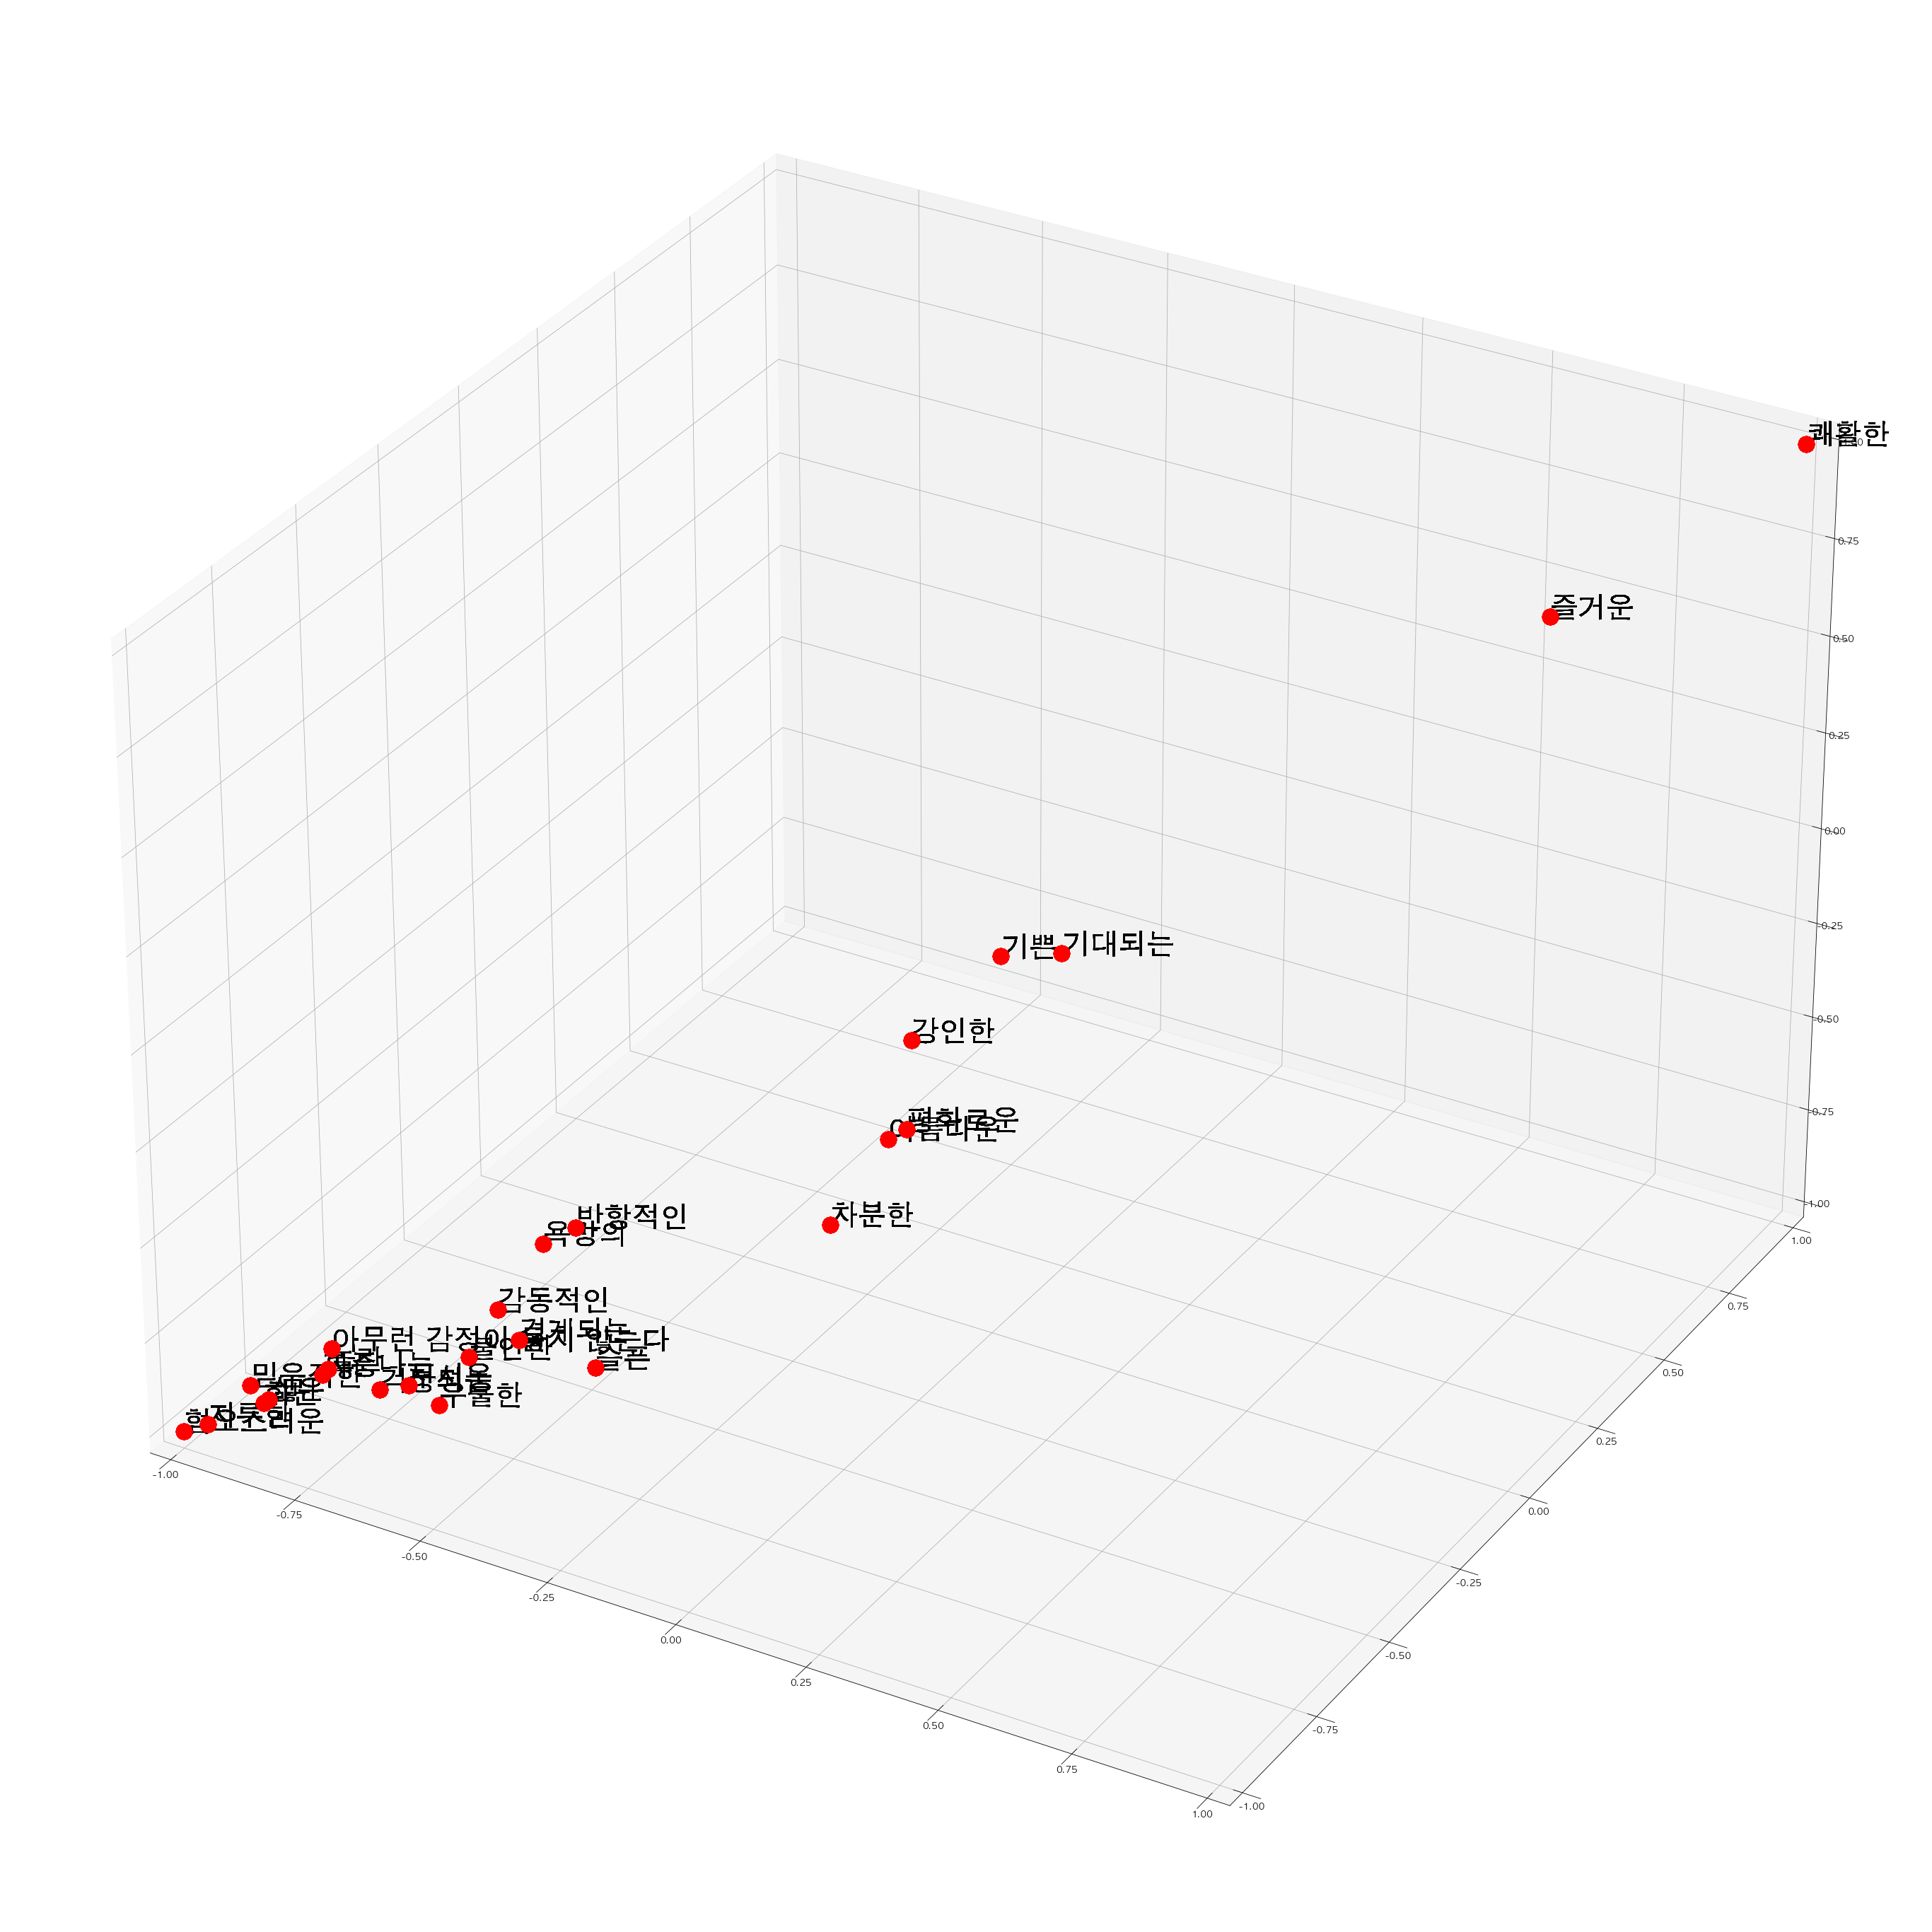

In [47]:
labels = list(emotion.keys())
fig = plt.figure(figsize=(50, 50))
ax = fig.gca(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)

for idx, name in enumerate(labels):
    for key, values in emotion.items():
        ax.scatter(emotion[name][0], emotion[name][1], emotion[name][2], color='red', s=500)
        ax.text(emotion[name][0], emotion[name][1], emotion[name][2], name, size=40)